# Extract trajectories from Set1ext for PPN single-zone processing
This notebook shows how to extract notebooks from Set1ext models, anywhere. These methods should be used to create trajectories for the OZoNe project

FH (170621)

This notebook lives in this repo: https://github.com/NuGrid/wendi-examples

### How ipython notebooks work

If you have never used an ipython notebook, then here are the few basic rules you need to know:

* each cell is a block of code or comments (in markdown, see pull-down menu above)
* in each cell you can edit code, several lines using the `Return` key to create a newline
* once you are happy with a block of code use the _play_ button above, or just hit `Shift`-`Return` to execute the block of code
* in this notebook you use the [NuGridPy tools](http://nugridpy.phys.uvic.ca) to analyze data, [latest version on Github](https://github.com/NuGrid/NuGridPy) 

## Initialize session

In [1]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2/"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Select the model you would like to etract a trajectory from

Create MESA instance, plot Kippenhahn diagrams and select location of the trajectory to be extracted.

In [2]:
s=ms.star_log(mass=12,Z=0.006)

nugrid_path = /data/nugrid_apod2/
closest set is set1.3a (Z = 0.006)
closest mass is 12.0
Using old star.logsa file ...
 reading ...100% 



<IPython.core.display.Javascript object>


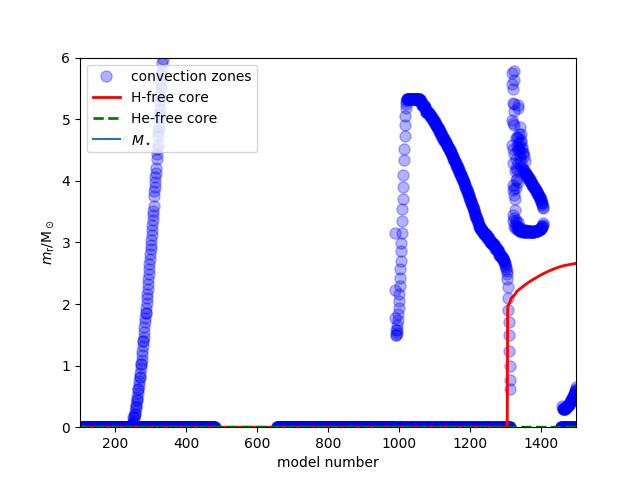

(0, 6)

In [3]:
ifig=111;close(ifig);figure(ifig)
s.kippenhahn(111,'model')
xlim(100,1500)
ylim(0, 6)


<IPython.core.display.Javascript object>


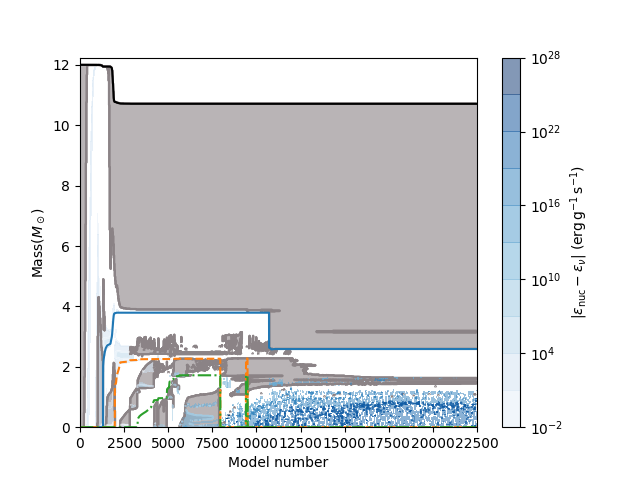

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [4]:
ifig=107;close(ifig);figure(ifig)
s.kip_cont(ifig=ifig)

We extract the thermodynamic trajectory from the mppnp output se files:

### The NuGrid post-processing model
Initialise:

In [5]:
pt=mp.se(mass=12,Z=0.006)

nugrid_path = /data/nugrid_apod2/
closest set is set1.3a (Z = 0.006)
closest mass is 12.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


In [6]:
pt.se.get('temperature_unit')

1000000000.0

## Two ways of writing the trajectory

### nugridse method "trajectory" 
This method writes a trajectory at constant mass. The docstring says it interpolates to the given mass coordinate. The output format does not have any headers and creates a blank file, which is not good.

In [7]:
m_coor = 0.15
model_start = 235
r,rho,temperature, time = pt.trajectory(model_start, 1306, 10,\
                    m_coor, age_in_sec=True, online=False)

 reading ['age']...98%98%..98%

In [8]:
%less traj_0.15.dat

### ascii_table method 
The  `ascii_table.writeTraj` method of the `ascii_table` module of NuGridPy is meant to produce a standard trajectory format with header. 

**Task A1:** Use `ascii_table.writeTraj` in `nugridse.trajectory` for writing the actual trajectory.

**Task A2:** Make sure that `ascii_table.writeTraj` trajectory is a valid nsource option in `ppn`.


In [9]:
from nugridpy import ascii_table as at

In [10]:
%rm trajectory.input
at.writeTraj(filename='trajectory.input', data=[time,temperature,rho], \
             ageunit=1, tunit=1, rhounit=0, idNum=0)

rm: cannot remove 'trajectory.input': No such file or directory


In [11]:
%less trajectory.input

## Extract initial abundance at beginning of trajectory
This method produces an initial abundance file in some odd format, it does have a header, however, we have maybe other formats for this, such as the `iniab.dat` format?

In [12]:
pt.abund_at_masscoordinate(model_start,m_coor,online=False)

 reading ['rho']...100%iso_massf
 reading ['iso_massf']...100%

In [13]:
%less massf_0.15.dat

**Task B1:** Review the output format of `nugridse.abund_at_masscoordinate` method. Is there a better format for initial abundances already supported in `ppn`? 

Initial response: now, this is a good format.

**Task B2:** Make sure that whatever the adopted output of `nugridse.abund_at_masscoordinate` is, it can be read correctly by `ppn`.

**Task B3:** `nugridse.abund_at_masscoordinate` method takes the nearest mass on grid point, but does not interpolate. This is inconsistent with what `nugridse.trajectory` is doing. This needs to be fixed in `nugridse.abund_at_masscoordinate` so that it is interpolating to the exact mass coordinate.

## Extract Set1 trajectories

With this capability in hand we can extract trajectories from all environments to be found in Set1Ext. 

Trajectory name   | comment       | lead
------------------|---------------|-----
MS burn low-mass  | M=2, Z=0.01   |
MS burn massives  | M=12, Z=0.006  | Falk
PDCZ              | ....          | Adria
CC explosion      | ....          | Syndey?
C-shell  | | 

**Task C1:** add to this table

**Task C2:** extract a trajectory, setup a ppn RUN